# Clean PIOMAS data for CREG configuration ice initial state

In [32]:
# Select the PANGEO kernel to be able to use this Notebook
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
from matplotlib import rcParams
from mpl_toolkits.basemap import Basemap

%matplotlib inline

>> # Create a tmask for CREG 

In [33]:
CONFIG='CREG12.L75'

if CONFIG == 'CREG12.L75' :
    DATADOM='/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG12.L75/GRID/'
    filedom='CREG12.L75_domain_cfg.nc'

if CONFIG == 'CREG025.L75' :
    DATADOM='/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/RUNS/CREG025.L75/CREG025.L75-I/'
    filedom='CREG025.L75_domain_cfg.nc'

ds_dom=xr.open_dataset(DATADOM+filedom)
ds_dom

<xarray.Dataset>
Dimensions:       (t: 1, x: 1580, y: 1801, z: 75)
Dimensions without coordinates: t, x, y, z
Data variables:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    time_counter  (t) float64 ...
    jpiglo        int32 ...
    jpjglo        int32 ...
    jpkglo        int32 ...
    jperio        int32 ...
    ln_zco        int32 ...
    ln_zps        int32 ...
    ln_sco        int32 ...
    ln_isfcav     int32 ...
    glamt         (t, y, x) float64 ...
    glamu         (t, y, x) float64 ...
    glamv         (t, y, x) float64 ...
    glamf         (t, y, x) float64 ...
    gphit         (t, y, x) float64 ...
    gphiu         (t, y, x) float64 ...
    gphiv         (t, y, x) float64 ...
    gphif         (t, y, x) float64 ...
    e1t           (t, y, x) float64 ...
    e1u           (t, y, x) float64 ...
    e1v           (t, y, x) float64 ...
    e1f           (t, y, x) float64 ...
    e2t           (t, y, x) 

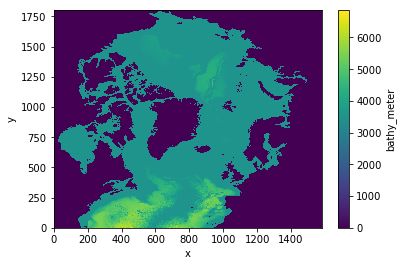

In [34]:
ds_dom['bathy_meter'].plot()

In [35]:
tmask=xr.where(ds_dom['bathy_meter'][0,:,:] > 0.,1.,0.)

In [36]:
tmask.shape

(1801, 1580)

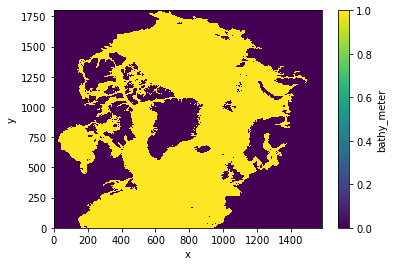

In [ ]:
tmask.plot()

>> # Read PIOMAS data interpolated on CREG

In [ ]:
DATAP="/home1/datawork/ctalandi/PRE-POST/FREDY/WEIGHTS/OFF-LINE/PIOMAS/INTERPOLATED/"

DATAOUT="/home1/datawork/ctalandi/PRE-POST/FREDY/WEIGHTS/OFF-LINE/PIOMAS/FINAL/"
%mkdir {DATAOUT}

mkdir: cannot create directory ‘/home1/datawork/ctalandi/PRE-POST/FREDY/WEIGHTS/OFF-LINE/PIOMAS/FINAL/’: File exists


In [ ]:
year=1981

In [ ]:
# Read the 3 variables reaquired 
filein=CONFIG+'_drowned_heff_PIOMAS_y'+str(year)+'.nc'
fld_piomas_heff=xr.open_dataset(DATAP+filein)

filein=CONFIG+'_drowned_snow_PIOMAS_y'+str(year)+'.nc'
fld_piomas_snow=xr.open_dataset(DATAP+filein)

filein=CONFIG+'_drowned_area_PIOMAS_y'+str(year)+'.nc'
fld_piomas_area=xr.open_dataset(DATAP+filein)

In [ ]:
fld_piomas=xr.Dataset()

fld_piomas['heff']=(('time_counter','y','x'),fld_piomas_heff['heff'])
fld_piomas['snow']=(('time_counter','y','x'),fld_piomas_snow['snow'])
fld_piomas['area']=(('time_counter','y','x'),fld_piomas_area['area'])
fld_piomas.coords['latitude']=fld_piomas_heff['latitude']
fld_piomas.coords['longitude']=fld_piomas_heff['longitude']

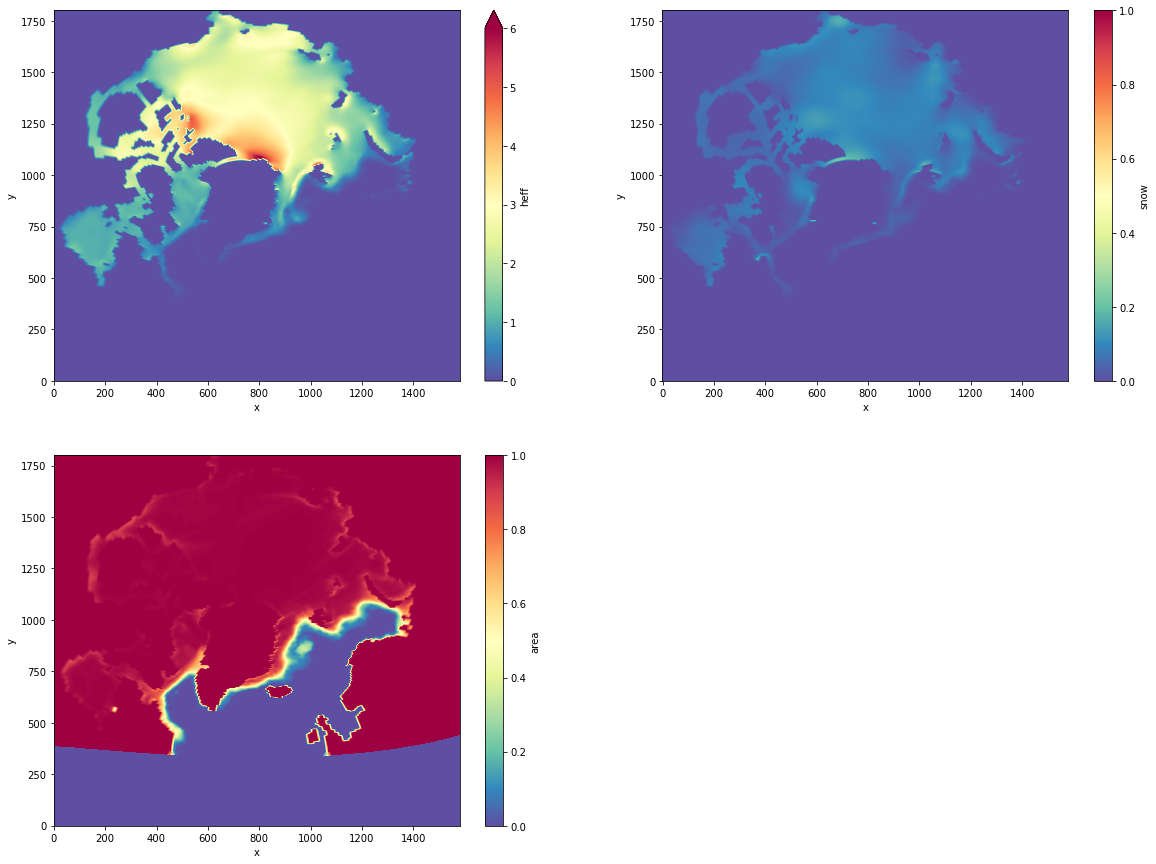

In [ ]:
plt.figure(figsize=(20,15))
plt.subplot(221)
fld_piomas['heff'].isel(time_counter=0).plot(vmax=6,cmap='Spectral_r')

plt.subplot(222)
fld_piomas['snow'].isel(time_counter=0).plot(vmax=1,cmap='Spectral_r')

plt.subplot(223)
fld_piomas['area'].isel(time_counter=0).plot(vmax=1,cmap='Spectral_r')


In [ ]:
fld_piomas['tmask']=(('time_counter','y','x'),np.tile(np.array(tmask),(12,1,1)))

In [ ]:
fld_piomas['heff_msk']=(('time_counter','y','x'),fld_piomas['tmask']*fld_piomas['heff'])
fld_piomas['snow_msk']=(('time_counter','y','x'),fld_piomas['tmask']*fld_piomas['snow'])
fld_piomas['area_msk']=(('time_counter','y','x'),fld_piomas['tmask']*fld_piomas['area'])
fld_piomas

<xarray.Dataset>
Dimensions:    (time_counter: 12, x: 1580, y: 1801)
Coordinates:
    latitude   (y, x) float32 ...
    longitude  (y, x) float32 ...
Dimensions without coordinates: time_counter, x, y
Data variables:
    heff       (time_counter, y, x) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    snow       (time_counter, y, x) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    area       (time_counter, y, x) float32 0.0 0.0 0.0 0.0 ... 1.0 1.0 1.0 1.0
    tmask      (time_counter, y, x) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    heff_msk   (time_counter, y, x) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    snow_msk   (time_counter, y, x) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    area_msk   (time_counter, y, x) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

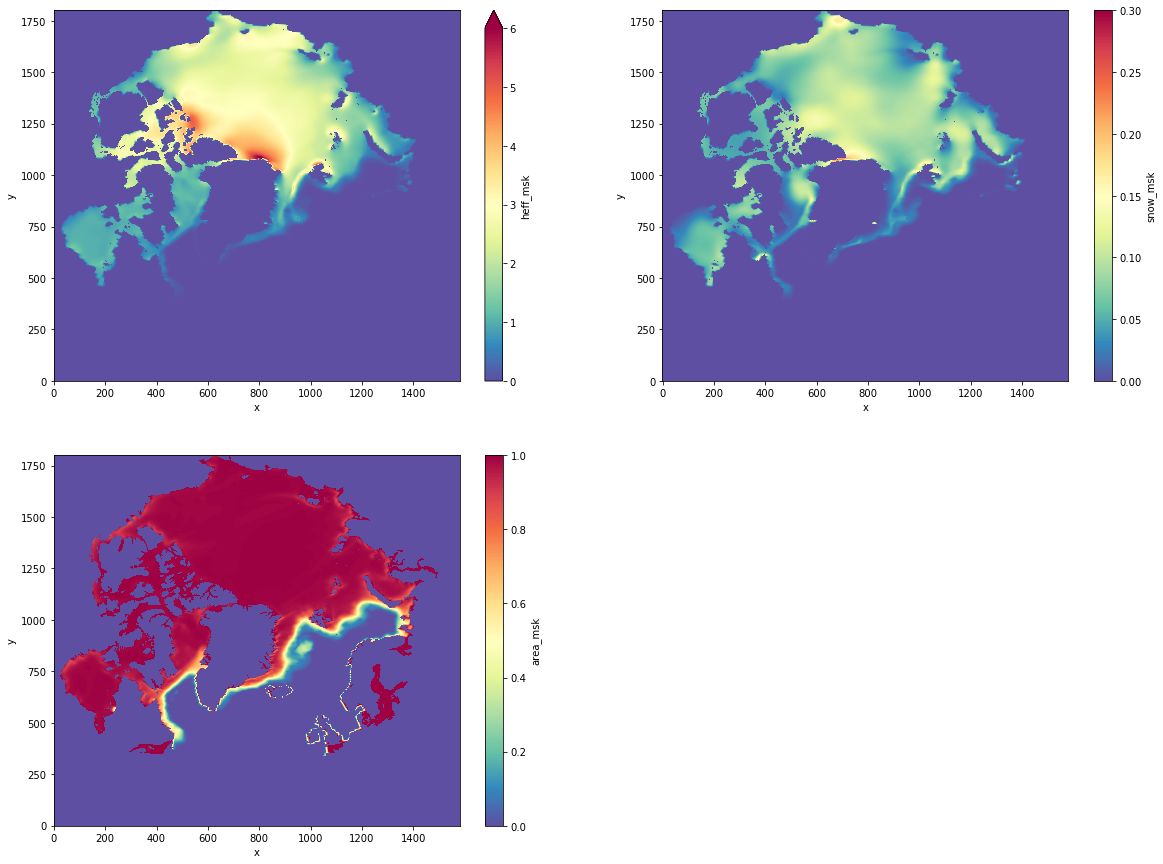

In [ ]:
plt.figure(figsize=(20,15))
plt.subplot(221)
fld_piomas['heff_msk'].isel(time_counter=0).plot(vmax=6,cmap='Spectral_r')

plt.subplot(222)
fld_piomas['snow_msk'].isel(time_counter=0).plot(vmax=0.3,cmap='Spectral_r')

plt.subplot(223)
fld_piomas['area_msk'].isel(time_counter=0).plot(vmax=1,cmap='Spectral_r')



In [ ]:
dsout=xr.Dataset()
dsout.coords['time']=np.arange(12)+1.
dsout.coords['latitude']=fld_piomas['latitude']
dsout.coords['longitude']=fld_piomas['longitude']

dsout['heff']=(('time','y','x'),fld_piomas['heff_msk'])
dsout['heff'].attrs['units']='m'

dsout['snow']=(('time','y','x'),fld_piomas['snow_msk'])
dsout['snow'].attrs['units']='m'

dsout['area']=(('time','y','x'),xr.where(fld_piomas['heff_msk']>0.,fld_piomas['area_msk'],0.))
dsout['area'].attrs['units']='-'

dsout.attrs=fld_piomas.attrs

dsout.to_netcdf(DATAOUT+CONFIG+'_PIOMAS_y'+str(year)+'.nc',unlimited_dims='time')